In [1]:
using Plots, LinearAlgebra, ProgressMeter, SparseArrays, Random, PyCall, Statistics, Distances
using FileIO, CSV, DataFrames, JLD, MLDatasets
using LightGraphs
#using Interact
plotly()

np = pyimport("numpy")
sk = pyimport("sklearn")
torch = pyimport("torch")
sk.manidold = pyimport("sklearn.manifold") 

include("EDM.jl")

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /home/rsonthal/.julia/packages/Plots/lmp2A/src/backends.jl:372


Main.EDM

In [2]:
function smooth(A, k = 7)
    B = zeros(length(A))
    n = length(A)
    for i = 1:length(B)
        count = 0
        for j = 1:k
            idx = j-Int(ceil(k/2))
            if i+idx >= 1 && i+idx <= n
                count += 1
                B[i] += A[i+idx]
            end
        end
        B[i] = B[i]/count
    end
    
    return B
end

smooth (generic function with 2 methods)

# MNIST Plots

In [19]:
dictM = load("MNIST-500-missing70-true.jld")
dictI = load("MNIST-500-isomap-true.jld")
dictP = load("MNIST-500-perturbedsnr-1,5-true.jld")

dictNM = load("MNIST-missing-NN.jld")
mds_acc_NN_M = dictNM["mds acc"]
lower_mds_acc_NN_M = dictNM["lower mds acc"]

mds_acc_NN_P = torch.load("mds_acc-MNIST-NN-Perturbed15")[:numpy]()
lower_mds_acc_NN_P = torch.load("lower_mds_acc-MNIST-NN-Perturbed15")[:numpy]()
mds_acc_NN_I = torch.load("mds_acc-MNIST-NN-isomap")[:numpy]()
lower_mds_acc_NN_I = torch.load("lower_mds_acc-MNIST-NN-isomap")[:numpy]();

In [20]:
mds_accM = dictM["mds accuracy"]
mds_accI = dictI["mds accuracy"]
mds_accP = dictP["mds accuracy"]

lower_mds_accM = dictM["lower mds accuracy"]
lower_mds_accI = dictI["lower mds accuracy"]
lower_mds_accP = dictP["lower mds accuracy"]

true_accM = dictM["true accuracy"]
true_accP = dictP["true accuracy"]
true_accI = dictI["true accuracy"]

lower_accM = dictM["lower acuracy"]
lower_accP = dictP["lower acuracy"]
lower_accI = dictI["lower acuracy"];

In [21]:
TM = argmin(mds_accM) - 1
TP = argmin(mds_accP) - 1
TI = argmin(mds_accI) - 1

247

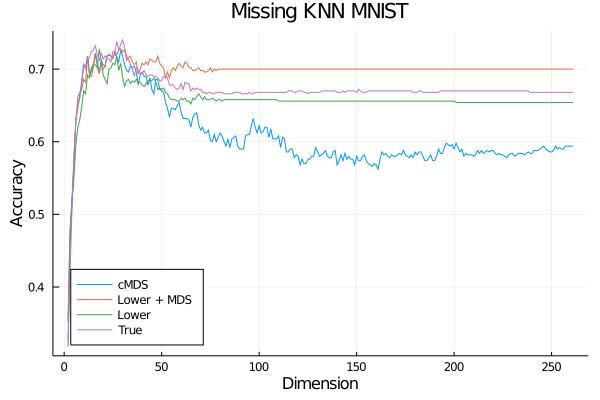

In [22]:
plot(collect(2:TM+1), mds_accM[1:TM], xlabel = "Dimension", label = "cMDS", ylabel = "Accuracy")
plot!(collect(2:TM+1), lower_mds_accM[1:TM], xlabel = "Dimension", label = "Lower + MDS")
plot!(collect(2:TM+1), lower_accM[1:TM], xlabel = "Dimension", label = "Lower")
plot!(collect(2:TM+1), true_accM[1:TM], xlabel = "Dimension", label = "True", legend = :bottomleft, title = "Missing KNN MNIST")

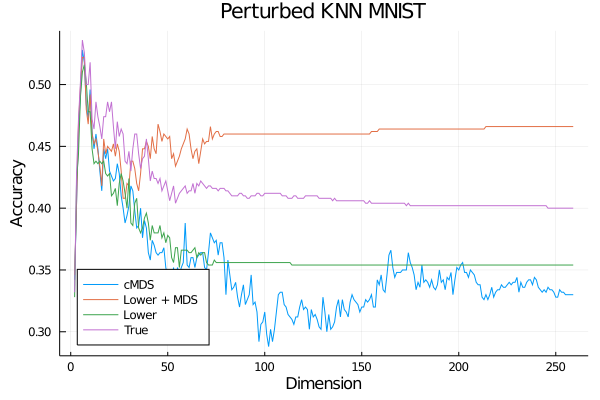

In [23]:
plot(collect(2:TP+1), mds_accP[1:TP], xlabel = "Dimension", label = "cMDS", ylabel = "Accuracy")
plot!(collect(2:TP+1), lower_mds_accP[1:TP], xlabel = "Dimension", label = "Lower + MDS")
plot!(collect(2:TP+1), lower_accP[1:TP], xlabel = "Dimension", label = "Lower", title = "Perturbed KNN MNIST")
plot!(collect(2:TP+1), true_accP[1:TP], xlabel = "Dimension", label = "True", legend = :bottomleft)

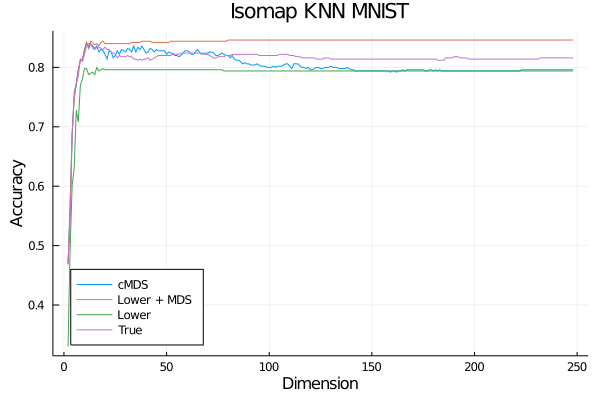

In [24]:
plot(collect(2:TI+1), mds_accI[1:TI], xlabel = "Dimension", label = "cMDS", ylabel = "Accuracy")
plot!(collect(2:TI+1), lower_mds_accI[1:TI], xlabel = "Dimension", label = "Lower + MDS")
plot!(collect(2:TI+1), lower_accI[1:TI], xlabel = "Dimension", label = "Lower", title = "Isomap KNN MNIST")
plot!(collect(2:TI+1), true_accI[1:TI], xlabel = "Dimension", label = "True", legend = :bottomleft)

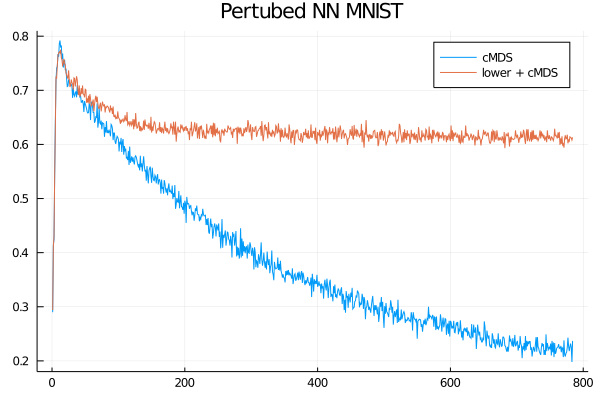

In [25]:
plot(collect(1:784),mds_acc_NN_P, label = "cMDS")
plot!(collect(1:784),lower_mds_acc_NN_P, label = "lower + cMDS", title = "Pertubed NN MNIST")

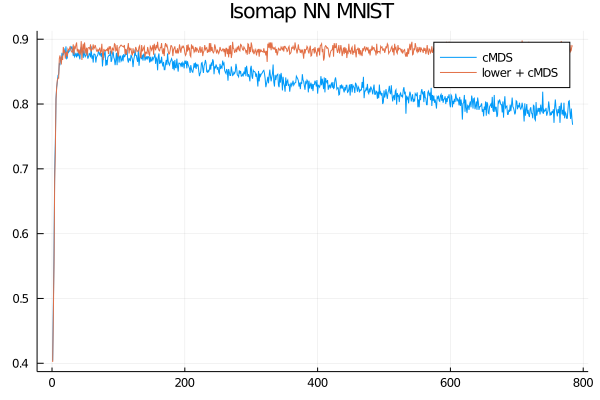

In [26]:
plot(collect(1:784),mds_acc_NN_I, label = "cMDS")
plot!(collect(1:784),lower_mds_acc_NN_I, label = "lower + cMDS", title = "Isomap NN MNIST")

In [176]:
plot(collect(1:454),mds_acc_NN_M, label = "cMDS")
plot!(collect(1:454),lower_mds_acc_NN_M, label = "lower + cMDS", title = "Missing NN MNIST")

<!DOCTYPE html>
 
 
 Plots.jl

# Fashion MNIST Plots

In [3]:
dictM = load("FashionMNIST-500-missing70-true.jld")
dictI = load("FashionMNIST-Isomap-KNN.jld")
dictP = load("FashionMNIST-500-perturbed-2,1-true.jld");

dictNP = load("FashionMNIST-perturbed-2,1-NN.jld")

mds_acc_NN_I = torch.load("mds_acc-FMNIST-NN-isomap")[:numpy]()
lower_mds_acc_NN_I = torch.load("lower_mds_acc-FMNIST-NN-isomap")[:numpy]();

mds_acc_NN_M = torch.load("mds_acc-FMNIST-NN-missing")[:numpy]()
lower_mds_acc_NN_M = torch.load("lower_mds_acc-FMNIST-NN-missing")[:numpy]();

In [4]:
mds_accM = dictM["mds accuracy"]
mds_accI = dictI["mds acc"]
mds_accP = dictP["mds accuracy"]

lower_mds_accM = dictM["lower mds accuracy"]
lower_mds_accI = dictI["lower mds acc"]
lower_mds_accP = dictP["lower mds accuracy"]

true_accM = dictM["true accuracy"]
true_accP = dictP["true accuracy"]
true_accI = dictI["true acc"]

lower_accM = dictM["lower acuracy"]
lower_accP = dictP["lower acuracy"]
lower_accI = dictI["lower acc"];

lower_mds_accNP = dictNP["lower mds acc"]
mds_accNP = dictNP["mds acc"];

In [12]:
TM = argmin(mds_accM) - 1
TP = argmin(mds_accP) - 1
TI = length(lower_accI)

gr()

Plots.GRBackend()

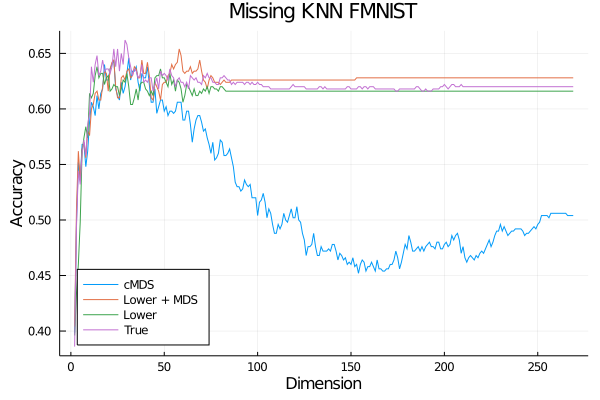

In [13]:
plot(collect(2:TM+1), mds_accM[1:TM], xlabel = "Dimension", label = "cMDS", ylabel = "Accuracy")
plot!(collect(2:TM+1), lower_mds_accM[1:TM], xlabel = "Dimension", label = "Lower + MDS")
plot!(collect(2:TM+1), lower_accM[1:TM], xlabel = "Dimension", label = "Lower", title = "Missing KNN FMNIST")
plot!(collect(2:TM+1), true_accM[1:TM], xlabel = "Dimension", label = "True", legend = :bottomleft)

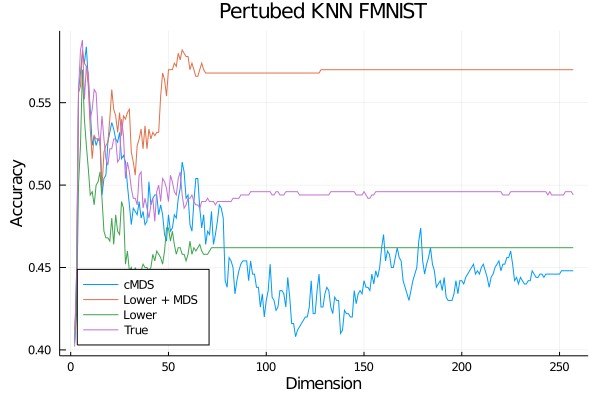

In [14]:
plot(collect(2:TP+1), mds_accP[1:TP], xlabel = "Dimension", label = "cMDS", ylabel = "Accuracy")
plot!(collect(2:TP+1), lower_mds_accP[1:TP], xlabel = "Dimension", label = "Lower + MDS")
plot!(collect(2:TP+1), lower_accP[1:TP], xlabel = "Dimension", label = "Lower", title = "Pertubed KNN FMNIST")
plot!(collect(2:TP+1), true_accP[1:TP], xlabel = "Dimension", label = "True", legend = :bottomleft)

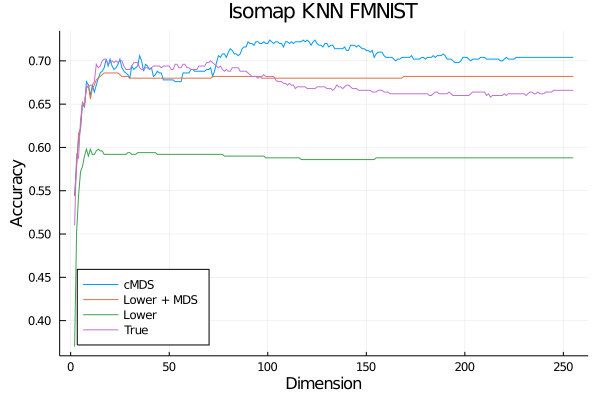

In [15]:
plot(collect(2:TI+1), mds_accI[1:TI], xlabel = "Dimension", label = "cMDS", ylabel = "Accuracy")
plot!(collect(2:TI+1), lower_mds_accI[1:TI], xlabel = "Dimension", label = "Lower + MDS")
plot!(collect(2:TI+1), lower_accI[1:TI], xlabel = "Dimension", label = "Lower", title = "Isomap KNN FMNIST")
plot!(collect(2:TI+1), true_accI[1:TI], xlabel = "Dimension", label = "True", legend = :bottomleft)

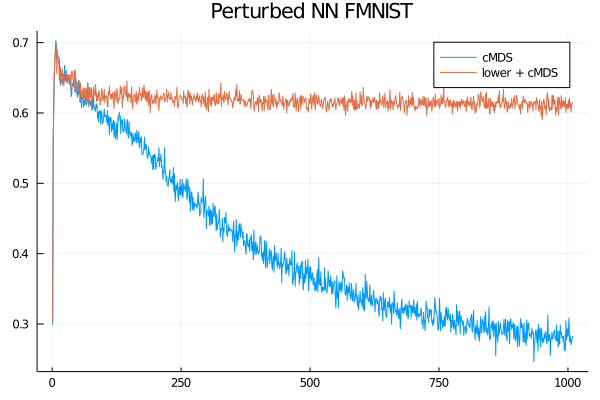

In [16]:
plot(collect(1:1009),mds_accNP, label = "cMDS", title = "Perturbed NN FMNIST")
plot!(collect(1:1009),lower_mds_accNP, label = "lower + cMDS")

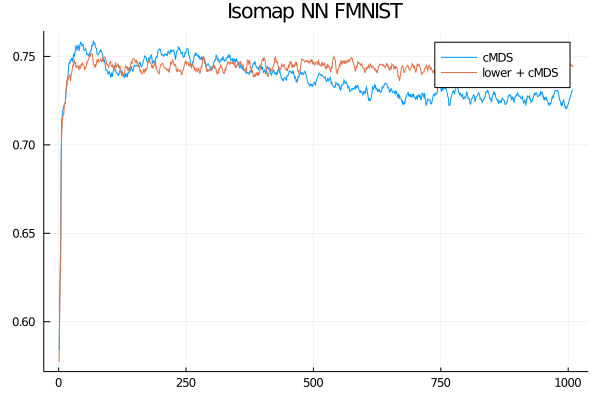

In [17]:
plot(collect(1:1009),smooth(mds_acc_NN_I), label = "cMDS", title = "Isomap NN FMNIST")
plot!(collect(1:1009),smooth(lower_mds_acc_NN_I), label = "lower + cMDS")

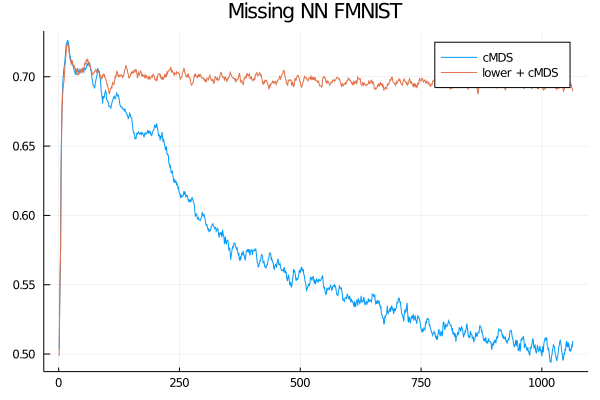

In [18]:
plot(collect(1:1064),smooth(mds_acc_NN_M), label = "cMDS", title = "Missing NN FMNIST")
plot!(collect(1:1064),smooth(lower_mds_acc_NN_M), label = "lower + cMDS")

# Cifar 10 Plots

In [27]:
dictM = load("Cifar10-500-missing70-true.jld")
dictI = load("Cifar10-500-isomap-true.jld")
dictP = load("Cifar10-500-perturbed-5,9-true.jld");

dictNM = load("CIfar10-missing-NN.jld")

mds_acc_NN_I = torch.load("mds_acc-cifar-NN-isomap")[:numpy]()
lower_mds_acc_NN_I = torch.load("lower_mds_acc-cifar-NN-isomap")[:numpy]();

mds_acc_NN_P = torch.load("mds_acc-cifar-NN-perturbed5,9")[:numpy]()
lower_mds_acc_NN_P = torch.load("lower_mds_acc-cifar-NN-perturbed5,9")[:numpy]();

In [28]:
mds_accM = dictM["mds accuracy"]
mds_accI = dictI["mds accuracy"]
mds_accP = dictP["mds accuracy"]

lower_mds_accM = dictM["lower mds accuracy"]
lower_mds_accI = dictI["lower mds accuracy"]
lower_mds_accP = dictP["lower mds accuracy"]

true_accM = dictM["true accuracy"]
true_accP = dictP["true accuracy"]
true_accI = dictI["true accuracy"]

lower_accM = dictM["lower acuracy"]
lower_accP = dictP["lower acuracy"]
lower_accI = dictI["lower acuracy"];

lower_mds_accNM = dictNM["lower mds acc"]
mds_accNM = dictNM["mds acc"];

In [29]:
TM = argmin(mds_accM) - 1
TP = argmin(mds_accP) - 1
TI = argmin(lower_accI) - 1

268

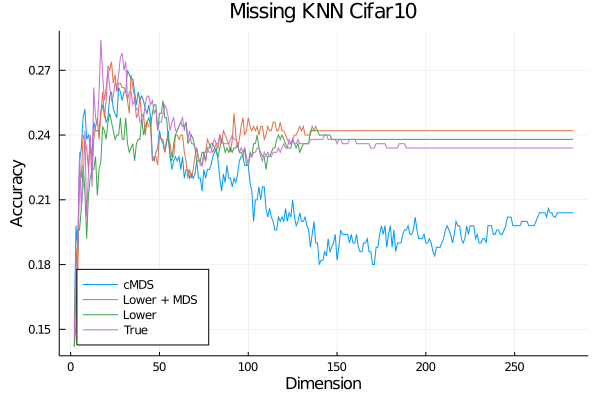

In [30]:
plot(collect(2:TM+1), mds_accM[1:TM], xlabel = "Dimension", label = "cMDS", ylabel = "Accuracy")
plot!(collect(2:TM+1), lower_mds_accM[1:TM], xlabel = "Dimension", label = "Lower + MDS")
plot!(collect(2:TM+1), lower_accM[1:TM], xlabel = "Dimension", label = "Lower", title = "Missing KNN Cifar10")
plot!(collect(2:TM+1), true_accM[1:TM], xlabel = "Dimension", label = "True", legend = :bottomleft)

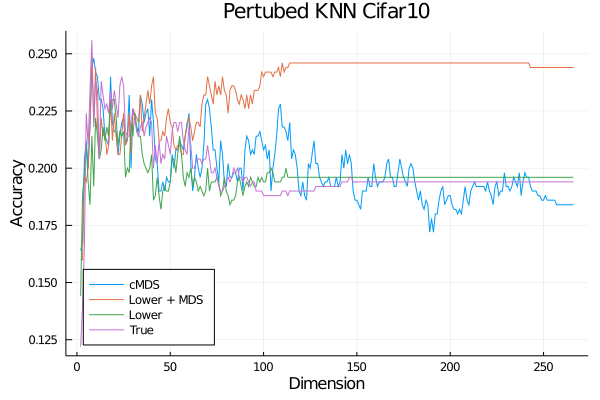

In [31]:
plot(collect(2:TP+1), mds_accP[1:TP], xlabel = "Dimension", label = "cMDS", ylabel = "Accuracy")
plot!(collect(2:TP+1), lower_mds_accP[1:TP], xlabel = "Dimension", label = "Lower + MDS")
plot!(collect(2:TP+1), lower_accP[1:TP], xlabel = "Dimension", label = "Lower", title = "Pertubed KNN Cifar10")
plot!(collect(2:TP+1), true_accP[1:TP], xlabel = "Dimension", label = "True", legend = :bottomleft)

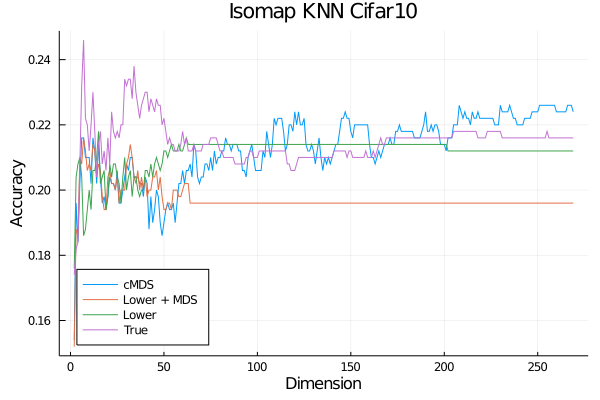

In [32]:
plot(collect(2:TI+1), mds_accI[1:TI], xlabel = "Dimension", label = "cMDS", ylabel = "Accuracy")
plot!(collect(2:TI+1), lower_mds_accI[1:TI], xlabel = "Dimension", label = "Lower + MDS")
plot!(collect(2:TI+1), lower_accI[1:TI], xlabel = "Dimension", label = "Lower", title = "Isomap KNN Cifar10")
plot!(collect(2:TI+1), true_accI[1:TI], xlabel = "Dimension", label = "True", legend = :bottomleft)

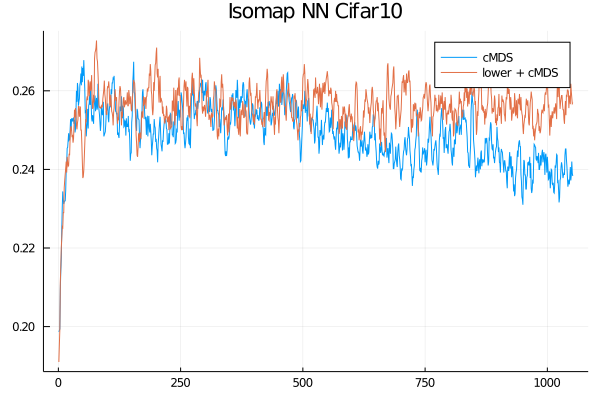

In [35]:
plot(collect(1:1052),smooth(mds_acc_NN_I,5), label = "cMDS", title = "Isomap NN Cifar10")
plot!(collect(1:1052),smooth(lower_mds_acc_NN_I,5), label = "lower + cMDS")

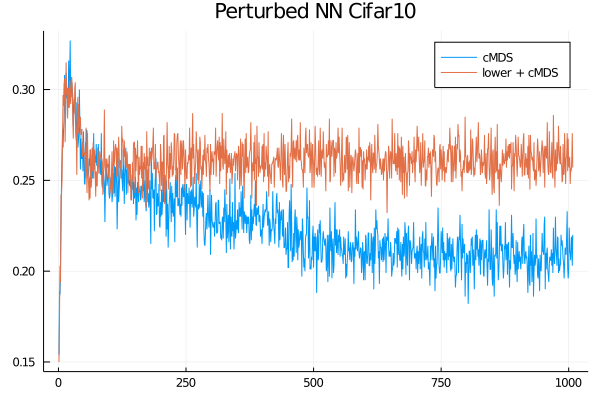

In [34]:
plot(collect(1:1008),mds_acc_NN_P, label = "cMDS", title = "Perturbed NN Cifar10")
plot!(collect(1:1008),lower_mds_acc_NN_P, label = "lower + cMDS")

In [213]:
plot(collect(1:559),mds_accNM, label = "cMDS", title = "Missing NN Cifar10")
plot!(collect(1:559),lower_mds_accNM, label = "lower + cMDS")

<!DOCTYPE html>
 
 
 Plots.jl